In [15]:
import pandas as pd


data = pd.read_csv('monodata/mammographic.csv', header=None)

In [16]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

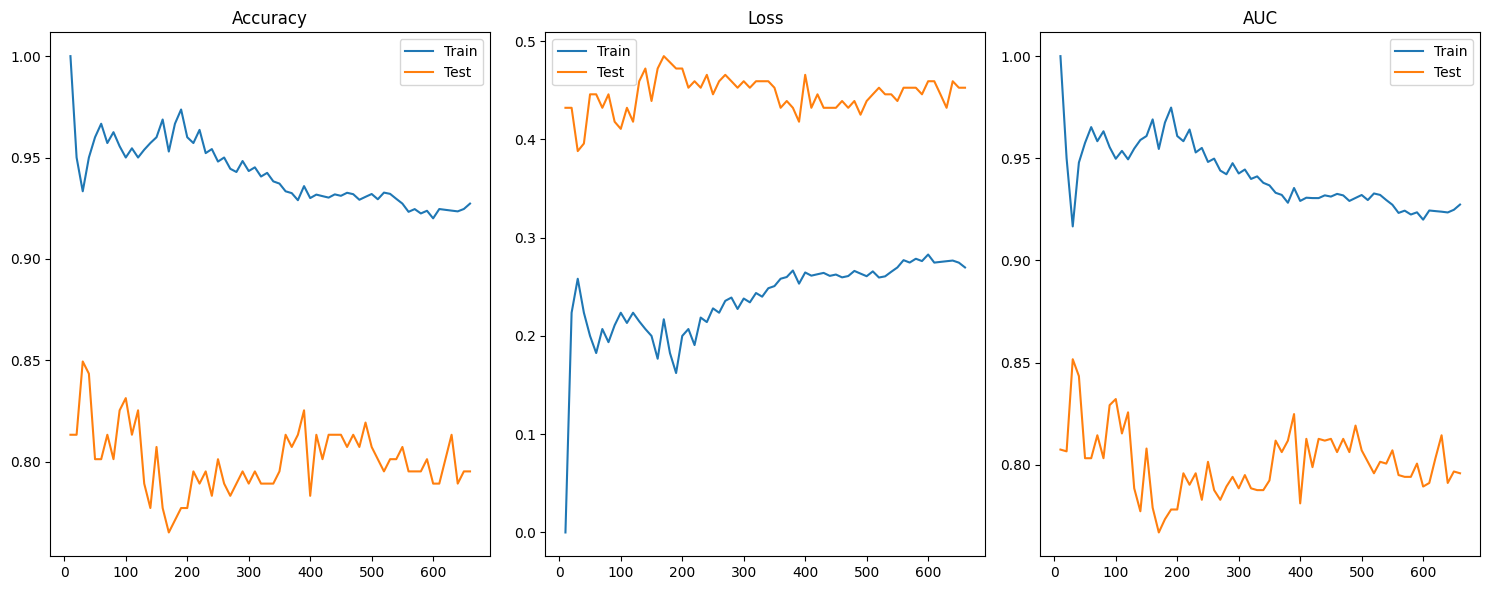

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import root_mean_squared_error

# Initialize lists to store metrics
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []
train_aucs = []
test_aucs = []

# Number of samples to take in each iteration
samples = list(range(10, len(X_train), 10))

for i in samples:
    # Train the model with i samples
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train[:i], y_train[:i])

    # Make predictions
    y_train_pred = model.predict(X_train[:i])
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    train_accuracy = accuracy_score(y_train[:i], y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_loss = root_mean_squared_error(y_train[:i], y_train_pred)
    test_loss = root_mean_squared_error(y_test, y_test_pred)
    train_auc = roc_auc_score(y_train[:i], y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)

    # Append metrics to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_aucs.append(train_auc)
    test_aucs.append(test_auc)


fig = plt.figure(figsize=(15, 6))

# Plot accuracy
ax = fig.add_subplot(131)
ax.plot(samples, train_accuracies, label='Train')
ax.plot(samples, test_accuracies, label='Test')
ax.set_title('Accuracy')
ax.legend()

# Plot loss
ax = fig.add_subplot(132)
ax.plot(samples, train_losses, label='Train')
ax.plot(samples, test_losses, label='Test')
ax.set_title('Loss')
ax.legend()

# Plot AUC
ax = fig.add_subplot(133)
ax.plot(samples, train_aucs, label='Train')
ax.plot(samples, test_aucs, label='Test')
ax.set_title('AUC')
ax.legend()

plt.tight_layout()
plt.show()